In [2]:
import matplotlib.pyplot as plt
import pickle5 as pickle

In [15]:
def rolling_mean(data, offset):
    offset_ctr = 0
    window = 0
    data_rm = []
    for i, loss in enumerate(data):
        window += loss
        if offset_ctr == offset:
            data_rm.append(window / offset)
            window = 0
            offset_ctr = 0
        offset_ctr += 1
    return data_rm

In [37]:
def create_graph(src_file, out_file, offset=10):
    a = 0
    with open(src_file, "rb") as f:
        a = pickle.load(f)
    gen_loss = rolling_mean(a[0], offset)
    disc_loss = rolling_mean(a[1], offset)
    lr_gen = rolling_mean(a[2], offset)
    lr_disc = rolling_mean(a[3], offset)
    plt.plot(gen_loss, label="Generator loss")
    plt.plot(disc_loss, label="Discriminator loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Rolling average, window size "+str(offset))
    plt.legend()
    plt.savefig(out_file+".png")
    plt.show()
    
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Rolling average, window size "+str(offset))
    plt.plot(lr_gen, label="Learning rate generator")
    plt.plot(lr_disc, label="Learning rate discriminator")
    plt.savefig("LR"+out_file+".png")
    plt.show()
    

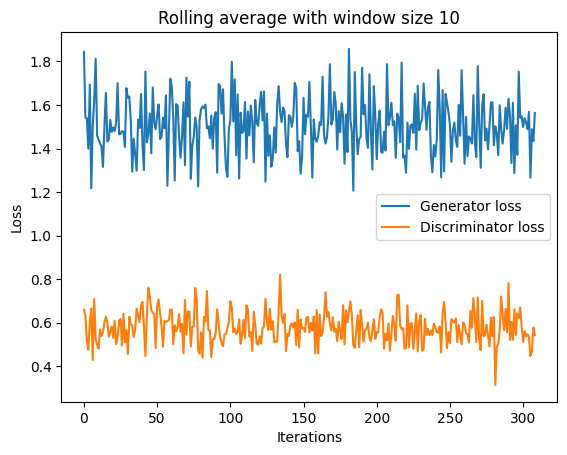

In [36]:
# create_graph("losses/finetuned", "losses/finetuned1e-8")